In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

In [2]:
# Read the dataset full of spams and non-spams where in the spam-column:
dataframe = pd.read_csv('spam.csv', encoding = 'latin1')
print(dataframe)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
# Let's drop the unneccessary columns and extract the data we want, which is emails with some kind of content i.e not empty 
dataframe = dataframe.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
dataframe.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Let's also change 'v1' and 'v2' names for cleaner set
dataframe.columns = ['Label', 'E-mail']

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   E-mail  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Let's check and get rid of duplicates if there are any
dataframe.duplicated().sum()

403

In [7]:
dataframe.drop_duplicates()

,Label,E-mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Let's see how many spam- and non-spam messages we have (datapoints)
count = dataframe['Label'].value_counts()

In [9]:
count_of_non_spams = count['ham']
count_of_spams = count['spam']

print("Count of non-spams:", count_of_non_spams)
print("Count of spams:", count_of_spams)

Count of non-spams: 4825
Count of spams: 747


In [10]:
# Let's change 'ham' and 'spam' into binary values, where 1 = spam and 0 = non-spam
dataframe.loc[dataframe['Label'] == 'spam', 'Label',] = 1
dataframe.loc[dataframe['Label'] == 'ham', 'Label',] = 0

In [11]:
dataframe.head()

,Label,E-mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


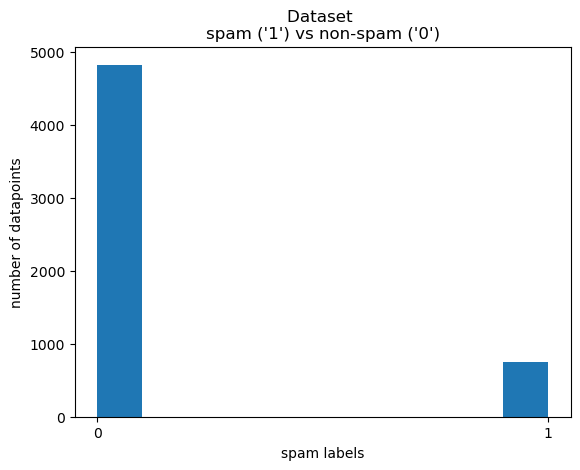

In [12]:
fig, ax = plt.subplots()
ax.hist(dataframe['Label'])
ax.set_title('Dataset \nspam (\'1\') vs non-spam (\'0\')')
ax.set_xlabel("spam labels")
ax.set_ylabel('number of datapoints')
ax.set_xticks([0,1])
plt.show()

In [13]:
# Let's seperate the columns of the data into their own parameters:
X = dataframe['E-mail']
y = dataframe['Label']

In [14]:
print(X, y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: E-mail, Length: 5572, dtype: object 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Label, Length: 5572, dtype: object


In [15]:
# Let's make our sets. Training, valid and test with 7:1,5:1,5
# Split the data into "train" (70%) and "temp" (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)

# Split the "temp" set into "validation" (50%) and "test" (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [16]:
# Let's check the shapes of the original-, test-, val- and train data's X and y to see that we have succeeded in the grouping
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5572,)
(3900,)
(836,)
(836,)


In [17]:
print(y.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(5572,)
(3900,)
(836,)
(836,)


In [18]:
# Since the lengths match, the grouping and distribution has succeeded

In [19]:
# Let's now extract the features from data's. This is where TfidfVectorizer comes in.
# This allows us to assess the quantity and quality of words in emails and help us determine the spams.
# min_df ensures, that extremely infrequent words are cut-off of our equation, which makes these words more unique, making them less likely a spam
# Frequently appearing words can be assumed to be part of a spam message
features = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
X_train_features = features.fit_transform(X_train)
X_test_features = features.transform(X_test)
X_val_features = features.transform(X_val)

y_val = y_val.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [20]:
# Let's see what kind of words appear most frequently in scams
spam_most_used_words = []
for sentence in dataframe[dataframe['Label'] == 1]['E-mail'].tolist():
    for word in sentence.split():
        if len(word)> 2:
            spam_most_used_words.append(word)

filter_df = pd.DataFrame(Counter(spam_most_used_words).most_common(30))

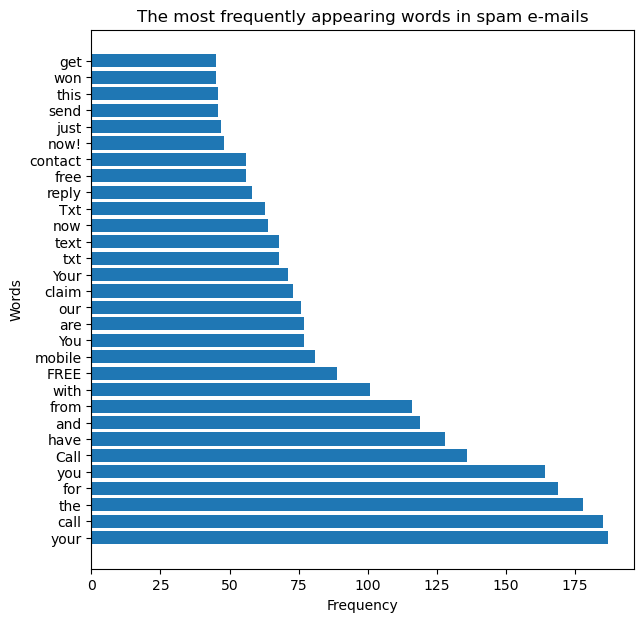

In [21]:
plt.figure(figsize=(7, 7))
plt.barh(filter_df[0], filter_df[1])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('The most frequently appearing words in spam e-mails')
plt.show()

In [22]:
print(X_train)

2290    HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE L...
4087    He needs to stop going to bed and make with th...
2136                          Well done and ! luv ya all 
4667    IM REALY SOZ IMAT MY MUMS 2NITE WHAT ABOUT 2MORO 
4587    I wanted to wish you a Happy New Year and I wa...
                              ...                        
1180                           I'm in chennai velachery:)
3441    Save money on wedding lingerie at www.bridal.p...
1344                     Were somewhere on Fredericksburg
4623    Jus finish blowing my hair. U finish dinner al...
1289    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
Name: E-mail, Length: 3900, dtype: object


In [23]:
print(X_train_features)

  (0, 854)	0.5016970086542163
  (0, 3797)	0.2626624828835249
  (0, 369)	0.41370667298917224
  (0, 6828)	0.37315672973926345
  (0, 2162)	0.43742686919673984
  (0, 1050)	0.30888659028178705
  (0, 3075)	0.28662900030567595
  (1, 1971)	0.4989248514357227
  (1, 2725)	0.4093828265288236
  (1, 3890)	0.3130107735951054
  (1, 1139)	0.38620925349314306
  (1, 2856)	0.27315627842982065
  (1, 5852)	0.284188912439452
  (1, 4265)	0.42540412749952006
  (2, 6881)	0.6729504060422761
  (2, 3835)	0.7396876036595016
  (3, 360)	0.3846654452456247
  (3, 4184)	0.41849014704923565
  (3, 3254)	0.41849014704923565
  (3, 5716)	0.41849014704923565
  (3, 5047)	0.3737763234338551
  (3, 3249)	0.26044675315741483
  (3, 369)	0.34509308093924934
  (4, 2868)	0.14196458288801908
  (4, 3137)	0.16659198869161834
  :	:
  (3896, 1357)	0.2690633585349523
  (3896, 2018)	0.23047149600357264
  (3896, 1622)	0.23831004409365628
  (3896, 6417)	0.18748292422662982
  (3896, 6859)	0.17347016324467854
  (3896, 4114)	0.19430320313324012


In [24]:
def generate_confusion_matrix(y_true, y_pred, title_main):
    # visualize the confusion matrix
    ax = plt.subplot()
    c_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(c_mat, annot=True, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title(title_main, fontsize=15)

In [25]:
# Let's train our model and then do validation
clf_1 = LogisticRegression(solver = 'liblinear').fit(X_train_features, y_train)

In [26]:
y_val_pred = clf_1.predict(X_val_features)
tr_error = log_loss(y_val,y_val_pred)
train_accuracy = accuracy_score(y_val, y_val_pred)

In [27]:
print(f"The training error is: {tr_error}")
print(f"The training accuracy: {train_accuracy}")

The training error is: 1.681462299253073
The training accuracy: 0.9533492822966507


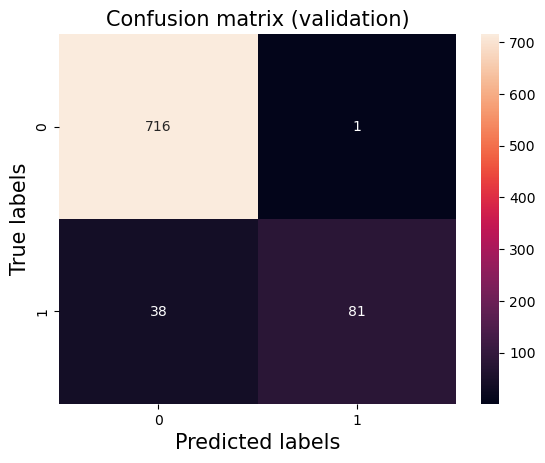

In [28]:
generate_confusion_matrix(y_val, y_val_pred, 'Confusion matrix (validation)' )

In [29]:
# Let's also use our test set
y_test_pred = clf_1.predict(X_test_features)
tst_error = log_loss(y_test,y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [30]:
print(f"The test error is: {tst_error}")
print(f"The test accuracy: {test_accuracy}")

The test error is: 1.0778604482391494
The test accuracy: 0.9700956937799043


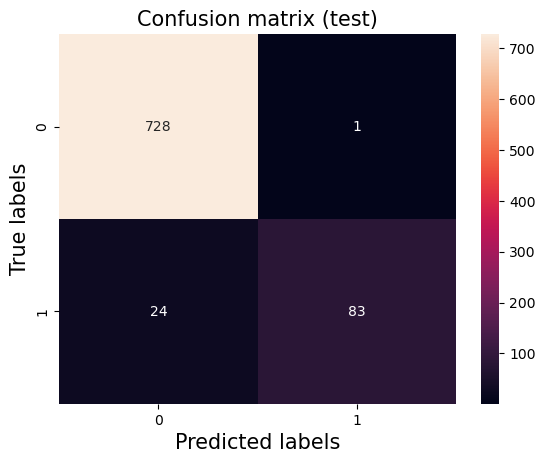

In [31]:
generate_confusion_matrix(y_test, y_test_pred, 'Confusion matrix (test)')